Logistic regression for the Population data

The optimal choice of parameters for the logistic function, given the sample data, is [1.17120094e+07 2.04186961e+03 9.69842680e+01] (ti, tau, Co, C1).


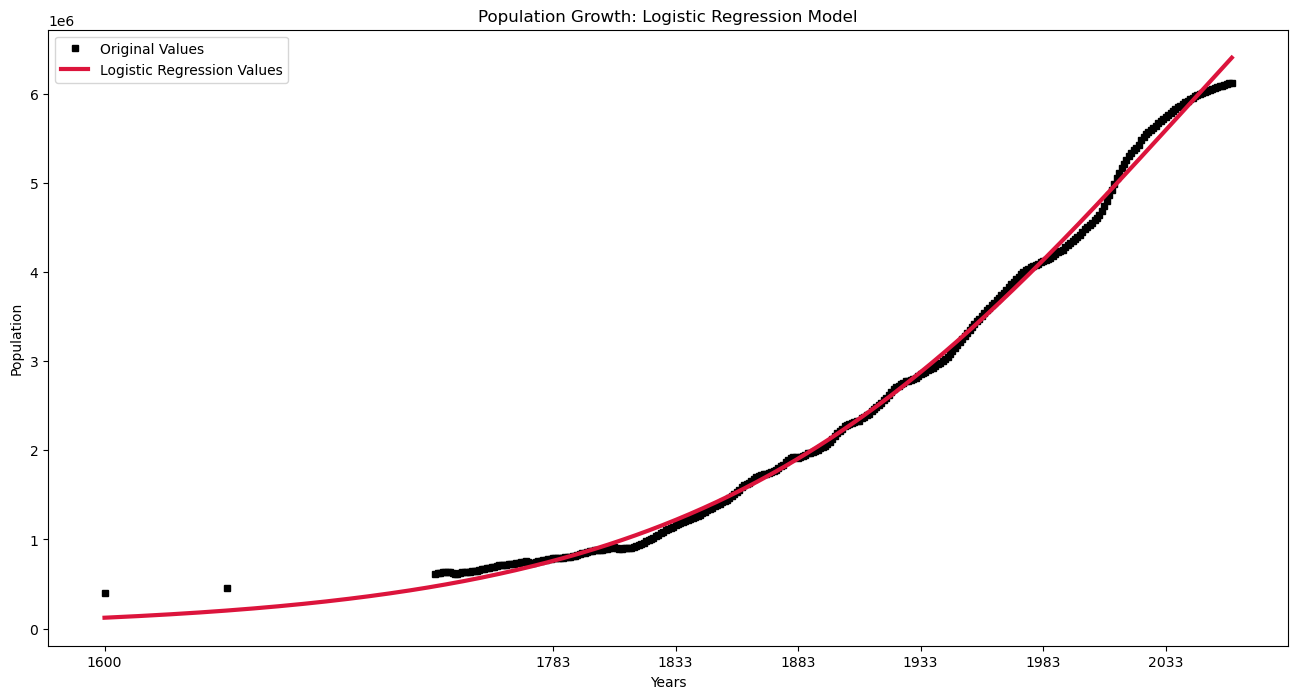

In [10]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

file = 'merged_norway_population.xlsx'  
data = pd.read_excel(file)

# Define the logistic function
def logistic(x, C, t, tau):
    return C / (1 + np.exp(-(x - t) / tau))

# Extracting the inputs (years) and outputs (population) from the data
reg_years = data['Year'].values
reg_values = data['Population'].values

# Set the range for prediction years, you can adjust this range as needed
reg_predictor_years = np.linspace(min(reg_years), 2060, 500)

# Fit the logistic model to the data
# Adjust the bounds
initial_guess = [1.5 * max(reg_values), np.median(reg_years), (max(reg_years) - min(reg_years)) / 20]

bounds = ([0, min(reg_years), 1], [3 * max(reg_values), 2060, 100])

popt, pcov = curve_fit(logistic, reg_years, reg_values, p0=initial_guess, bounds=bounds)
# Predict values
pred_outputs = logistic(reg_predictor_years, *popt)
# Output the parameters of the logistic function
print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, Co, C1).')

# Plotting the results
fig = plt.figure(figsize=(16, 8))
plt.plot(reg_years, reg_values, 's', color='black', markersize=5, label='Original Values')
plt.plot(reg_predictor_years, pred_outputs, color='crimson', lw=3, label='Logistic Regression Values')
plt.legend(loc='best')
plt.xticks(ticks=np.rint(reg_years[:len(reg_predictor_years):int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population Growth: Logistic Regression Model')
plt.show()


In [11]:
adjusted_reg_predictor_years = np.arange(1600, 2061)
# Predict values using the fitted logistic model for each year from 1600 to 2060
adjusted_pred_outputs = logistic(adjusted_reg_predictor_years, *popt)
# Create a DataFrame with the adjusted prediction data
adjusted_prediction_data = pd.DataFrame({
    'Year': adjusted_reg_predictor_years,
    'Population': adjusted_pred_outputs
})

adjusted_output_file_path = 'Population data final.xlsx'  # Replace with your desired file path

# Use the to_excel() method to export the DataFrame to an Excel file
adjusted_prediction_data.to_excel(adjusted_output_file_path, index=False) 